In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### PLOTTING FUNCTIONS

In [2]:
# Function to plot specified variable per run
def plot_all_runs(df_list, var, color=None):
    label = var
    for df in df_list:
        df[var].plot(label=label, color=color) if color else df[var].plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

def plot_difference(df_list, var1, var2):
    label = str(var1) + " - " + str(var2)
    for df in df_list:
        diff = df[var1] - df[var2]
        diff.plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.legend()

def plot_avg_per_type(df_list, agent_type, var, color=None):
    label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].mean().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

def plot_total_per_type(df_list, agent_type, var, color=None):
    label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].sum().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

### READ DATA

#### Model variables

In [3]:
# Read all model variables to list
model_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("model"):
        df = pd.read_csv("results/" + file)
        model_vars_df_list.append(df)

# Save timesteps where floods occur
flood_timesteps = np.array(model_vars_df_list[0].index[model_vars_df_list[0]["Flood"] == True])
flood_timesteps -= 1
print("FLOODS IMPLEMENTED AT TIMESTEPS", flood_timesteps)

# Show first dataframe
model_vars_df_list[0]

FLOODS IMPLEMENTED AT TIMESTEPS [99]


,Flood,N households,N cap firms,N cons firms,N serv firms,Regional demand,Export demand,Unemployment rate,Min wage,Avg wage,N cap bankrupt,N cons bankrupt,N serv bankrupt,Total HH consumption,Total HH net worth,Total flood damage
0,False,10000,125,200,300,5312.684,0.0,0.94,0.500,1.000294,0,0,0,5312.684,11453.012000,0.000000
1,False,10000,125,200,300,6266.021,0.0,0.77,0.500,1.040573,0,1,1,6266.021,11453.012000,0.000000
2,False,10000,125,200,300,7369.952,0.0,0.58,0.520,1.042628,0,1,1,7369.952,11453.012000,0.000000
3,False,10000,125,200,300,8252.377,0.0,0.42,0.520,1.043205,0,1,1,8252.377,11453.012000,0.000000
4,False,10000,125,200,300,7959.812,0.0,0.47,0.520,1.045178,0,1,1,7959.812,11453.012000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,10000,125,200,300,34403.473,0.0,0.63,0.530,1.051759,1,1,1,7216.943,9169.306344,69.646156
396,False,10000,125,200,300,34422.390,0.0,0.62,0.525,1.052173,0,1,1,7235.860,9169.306344,69.646156
397,False,10000,125,200,300,34324.133,0.0,0.64,0.525,1.050502,0,1,1,7137.603,9169.306344,69.646156
398,False,10000,125,200,300,34372.794,0.0,0.63,0.525,1.053312,0,1,1,7186.265,9169.306344,69.646156


#### Agent variables

In [4]:
agent_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("agent"):
        print(file)
        df = pd.read_csv("results/" + file)
        agent_vars_df_list.append(df)

agent_vars_df_list[0]

agent_vars_40.csv
agent_vars_20.csv
agent_vars_0.csv
agent_vars_80.csv
agent_vars_60.csv


,Step,AgentID,Type,Net worth,Sales,Price,Prod,Machine prod,Inventories,Past demand,Real demand,Wage,Labor demand,Capital amount,Flood damage
0,1,1,<class 'CRAB_agents.CapitalFirm'>,150.000000,0.000000,1.208000,1.042,1.041597,1.04,1.0,0.000,1.000,1.0,60.0,0.0
1,1,2,<class 'CRAB_agents.CapitalFirm'>,150.000000,0.000000,1.253000,1.067,1.067278,1.07,1.0,0.000,1.000,1.0,60.0,0.0
2,1,3,<class 'CRAB_agents.CapitalFirm'>,150.000000,0.000000,1.303000,1.036,1.036325,1.04,1.0,0.000,1.000,1.0,60.0,0.0
3,1,4,<class 'CRAB_agents.CapitalFirm'>,150.000000,0.000000,1.247000,1.074,1.074068,1.07,1.0,0.000,1.000,1.0,60.0,0.0
4,1,5,<class 'CRAB_agents.CapitalFirm'>,150.000000,0.000000,1.185000,1.078,1.077645,1.08,1.0,0.000,1.000,1.0,60.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250395,400,11498,<class 'CRAB_agents.CapitalFirm'>,21.593394,0.000000,1.042000,1.375,1.393000,1.38,1.0,0.000,1.104,1.0,5.0,0.0
4250396,400,11499,<class 'CRAB_agents.ConsumptionGoodFirm'>,9.584875,1.188000,0.885246,1.342,NaN,0.00,1.0,20.292,0.990,1.0,8.0,0.0
4250397,400,11500,<class 'CRAB_agents.ServiceFirm'>,22.298249,1.428094,1.005700,1.420,NaN,0.00,1.0,3.641,1.057,1.0,10.0,0.0
4250398,400,11501,<class 'CRAB_agents.ConsumptionGoodFirm'>,5.465746,0.000000,1.231043,1.393,NaN,0.00,1.0,1.000,1.007,NaN,8.0,NaN


### SANITY CHECKS

#### HOUSEHOLDS

##### HH CONSUMPTION

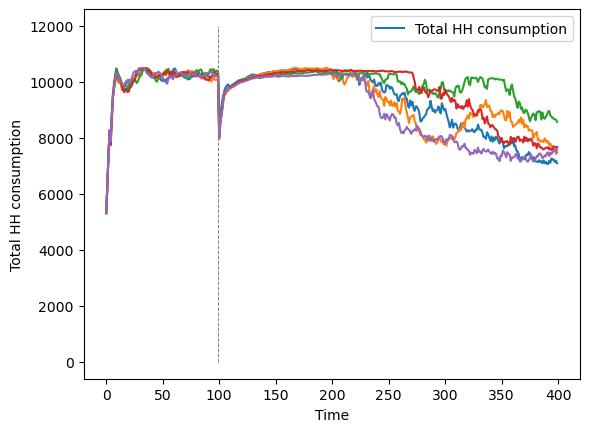

In [5]:
plot_all_runs(model_vars_df_list, "Total HH consumption")
plt.vlines(flood_timesteps, ymin=0, ymax=12000, color="grey", linestyle="--", linewidth=0.7)
# plt.ylim(0, 12000)
plt.show()

##### HH Flood damages

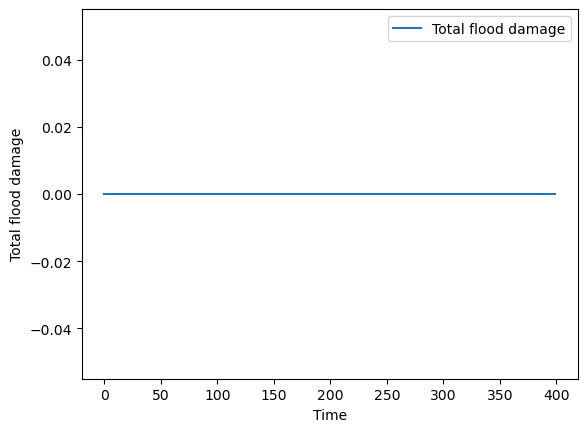

In [35]:
plot_all_runs(model_vars_df_list, "Total flood damage")
plt.vlines(flood_timesteps, ymin=0, ymax=45000, color="grey", linestyle="--", linewidth=0.7)
plt.show()

##### HH Net worth

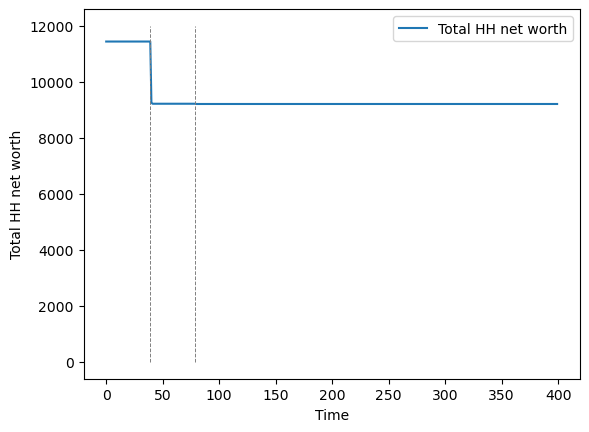

In [111]:
plot_all_runs(model_vars_df_list, "Total HH net worth")
plt.vlines(flood_timesteps, ymin=0, ymax=12000, color="grey", linestyle="--", linewidth=0.7)
plt.show()

##### ADAPTATION

##### Adaptation diffusion per measure

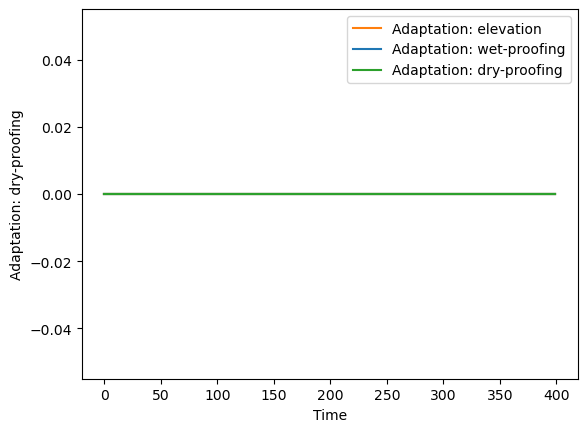

In [42]:
plot_all_runs(model_vars_df_list, "Adaptation: elevation", color="tab:orange")
plot_all_runs(model_vars_df_list, "Adaptation: wet-proofing", color="tab:blue")
plot_all_runs(model_vars_df_list, "Adaptation: dry-proofing", color="tab:green")

### FIRMS

#### N FIRMS

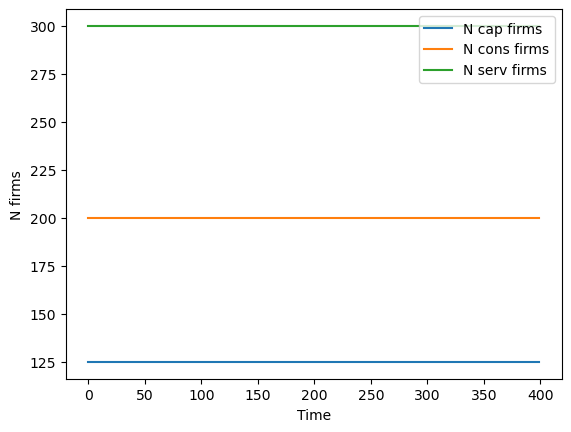

In [15]:
# Plot number of firms per sector
plot_all_runs(model_vars_df_list, "N cap firms", color="tab:blue")
plot_all_runs(model_vars_df_list, "N cons firms", color="tab:orange")
plot_all_runs(model_vars_df_list, "N serv firms", color="tab:green")

plt.ylabel("N firms")
plt.show()

##### N firms bankrupt

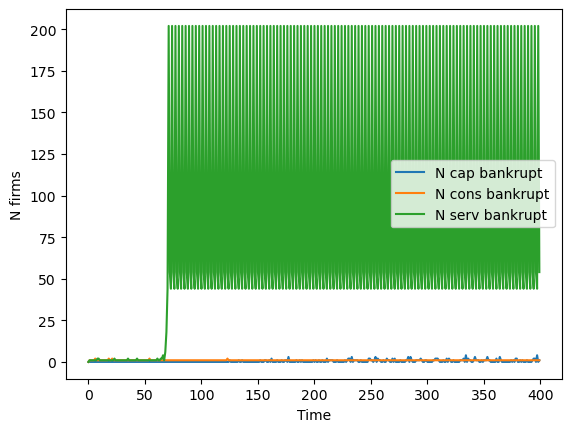

In [16]:
# Plot number of firms going bankrupt per sector
plot_all_runs(model_vars_df_list, "N cap bankrupt", color="tab:blue")
plot_all_runs(model_vars_df_list, "N cons bankrupt", color="tab:orange")
plot_all_runs(model_vars_df_list, "N serv bankrupt", color="tab:green")

plt.ylabel("N firms")
plt.show()

#### DEMAND

##### Real demand

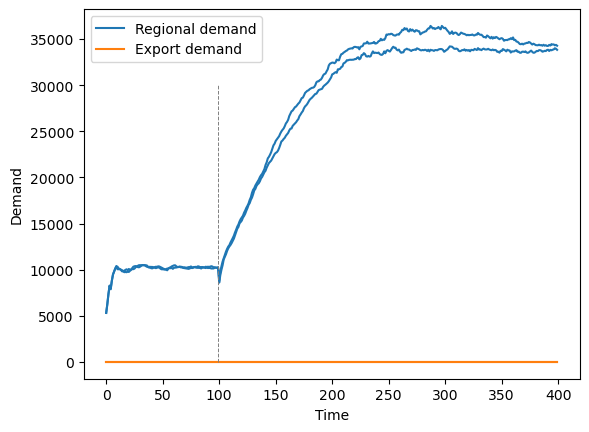

In [7]:
# Plot ratio regional:export demand
plot_all_runs(model_vars_df_list, "Regional demand", color="tab:blue")
plot_all_runs(model_vars_df_list, "Export demand", color="tab:orange")
# plt.ylim(4000, 5000)
# plt.xlim(0, 50)
plt.vlines(flood_timesteps, ymin=0, ymax=30000, color="grey", linestyle="--", linewidth=0.7)
plt.ylabel("Demand")
plt.show()

##### Sectoral demand

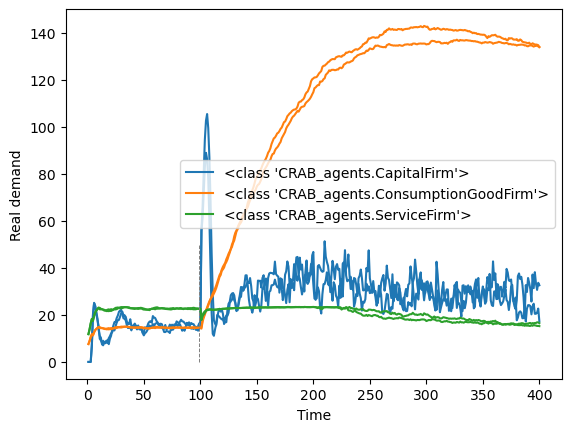

In [8]:
# Plot average demand per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Real demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Real demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Real demand", color="tab:green")
# plt.xlim(0, 50)
plt.vlines(flood_timesteps, ymin=0, ymax=50, color="grey", linestyle="--", linewidth=0.7)
plt.show()

##### Inventories

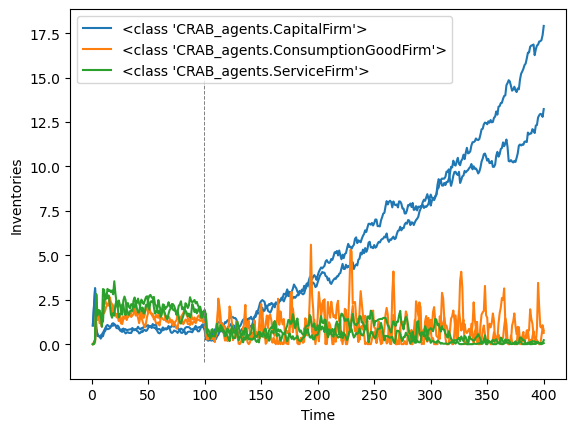

In [9]:
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inventories", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inventories", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inventories", color="tab:green")
plt.vlines(flood_timesteps, ymin=-1, ymax=15, color="grey", linestyle="--", linewidth=0.7)
# plt.xlim(0, 100)
plt.show()

##### Inventories/demand

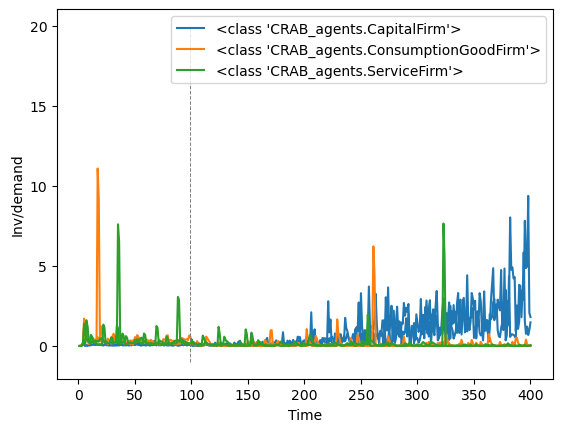

In [11]:
# Plot inventory level as fraction of demand
for i in range(len(agent_vars_df_list)):
    df = agent_vars_df_list[i]
    df["Inv/demand"] = df["Inventories"]/df["Past demand"]
    df = df.replace({np.inf: np.nan})
    agent_vars_df_list[i] = df
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inv/demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inv/demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inv/demand", color="tab:green")
plt.vlines(flood_timesteps, ymin=-1, ymax=20, color="grey", linestyle="--", linewidth=0.7)
plt.show()

#### LABOR

##### UNEMPLOYMENT RATE

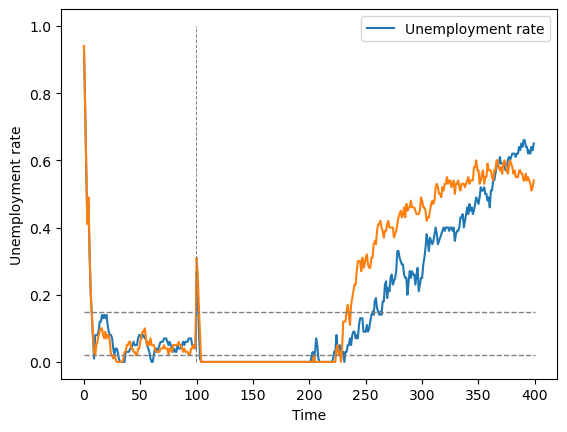

In [12]:
# Unemployment rate should vary between min 2-3 and max 10-15 percent
n_steps = len(model_vars_df_list[0])
plot_all_runs(model_vars_df_list, "Unemployment rate")
plt.hlines(y=0.02, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.hlines(y=0.15, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.vlines(flood_timesteps, ymin=0, ymax=1, color="grey", linestyle="--", linewidth=0.7)
plt.show()

##### LABOR DEMAND

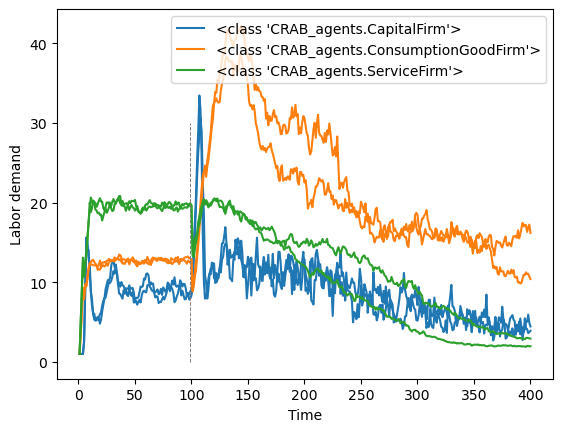

In [13]:
# Plot average labor demand per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Labor demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Labor demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Labor demand", color="tab:green")
plt.vlines(flood_timesteps, ymin=0, ymax=30, color="grey", linestyle="--", linewidth=0.7)
plt.show()

##### SIZE

In [ ]:
# Plot size (n employers) for all firms (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Size", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Size", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Size", color="tab:green")
plt.show()

In [ ]:
# Plot distribution of firms sizes at end of simulation
df = agent_vars_df_list[0]

firm_size_dict = {
                  "<class 'CRAB_agents.CapitalFirm'>": (45, 125),
                  "<class 'CRAB_agents.ConsumptionGoodFirm'>": (20, 200),
                  "<class 'CRAB_agents.ServiceFirm'>": (30, 300),
                 }

for k, v in firm_size_dict.items():
    for i in np.arange(9, 400, 10):
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Size", bins=10)
        plt.title("TIMESTEP: " + str(i+1) + " " + k)
        plt.xlabel("Size")
        plt.ylim(0, v[1])
        plt.xlim(0, v[0])
        # plt.show()
        plt.savefig("results/plots/sizes/" + str(k).split(".")[-1][:-2] + "_timestep" + str(i+1))
        plt.close()

for k, v in firm_size_dict.items():
    fig, ax = plt.subplots(2, 4)
    for j, i in enumerate(np.arange(49, 400, 50)):
        a = ax[j//4][j%4]
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Size", ax=a, bins=10)
        a.set_title("Step: " + str(i+1))
        a.set_xlabel("Size")
        a.set_ylim(0, v[1])
        a.set_xlim(0, v[0])
    fig.suptitle(k.split(".")[-1][:-2])
    fig.tight_layout()
    plt.savefig("results/plots/sizes/" + str(k).split(".")[-1][:-2])

In [ ]:
# Plot distribution of firms market share at end of simulation
df = agent_vars_df_list[0]

firm_size_dict = {
                  # "<class 'CRAB_agents.CapitalFirm'>": (0.01, 150),
                  "<class 'CRAB_agents.ConsumptionGoodFirm'>": (0.02, 20),
                  "<class 'CRAB_agents.ServiceFirm'>": (0.015, 20),
                 }

for k, v in firm_size_dict.items():
    for i in np.arange(9, 400, 10):
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Market share", bins=100)
        plt.title("TIMESTEP: " + str(i+1) + " " + k)
        plt.xlabel("Market share")
        plt.ylim(0, v[1])
        plt.xlim(0, v[0])
        # plt.savefig("results/plots/MS/" + str(k).split(".")[-1][:-2] + "_timestep" + str(i+1))
        plt.close()

for k, v in firm_size_dict.items():
    fig, ax = plt.subplots(2, 4)
    for j, i in enumerate(np.arange(49, 400, 50)):
        a = ax[j//4][j%4]
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Market share", ax=a, bins=50)
        a.set_title("Step: " + str(i+1))
        a.set_xlabel("Market share")
        a.set_ylim(0, v[1])
        a.set_xlim(0, 0.002)
    fig.suptitle(k.split(".")[-1][:-2])
    fig.tight_layout()
    # plt.savefig("results/plots/MS/" + str(k).split(".")[-1][:-2])

##### MIN and AVERAGE WAGE

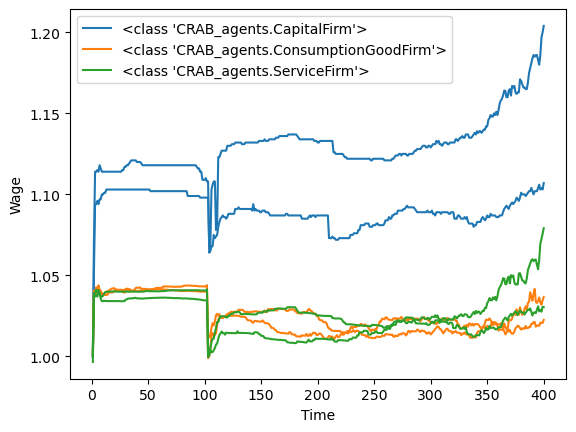

In [14]:
# Plot average wage per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.show()

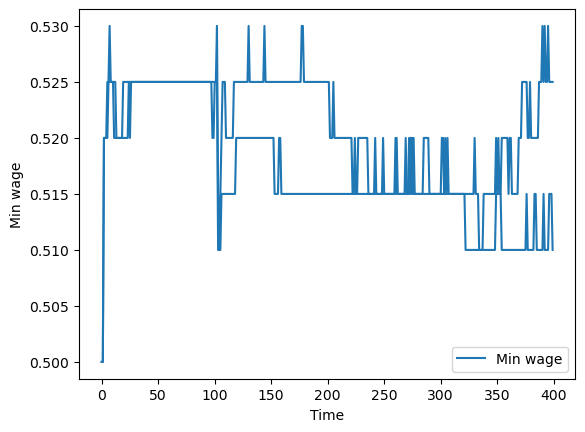

In [15]:
# Plot minimum wage
plot_all_runs(model_vars_df_list, "Min wage", color="tab:blue")
plt.show()

#### SALES

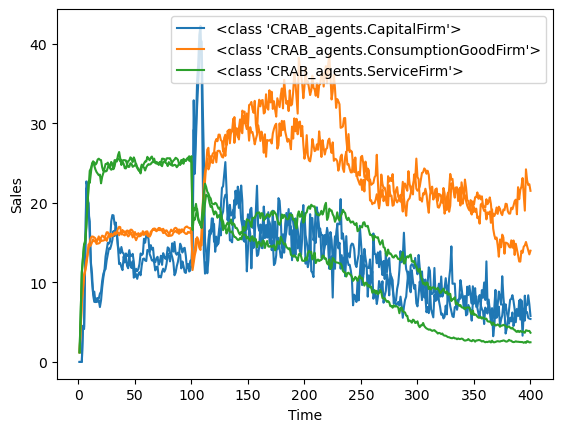

In [16]:
# Plot average prices per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Sales", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Sales", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Sales", color="tab:green")
plt.show()

#### PRICES

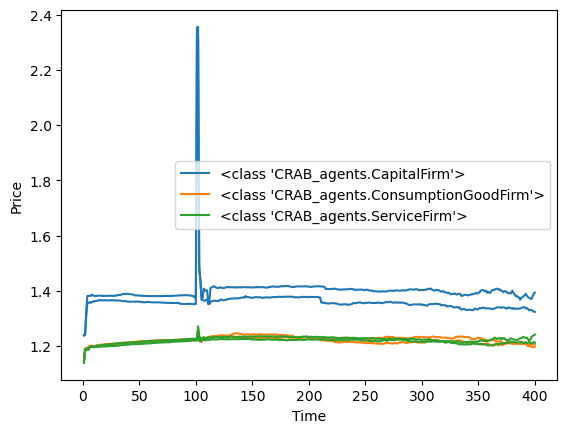

In [17]:
# Plot average prices per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Price", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Price", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Price", color="tab:green")
plt.show()

#### MARKET SHARES

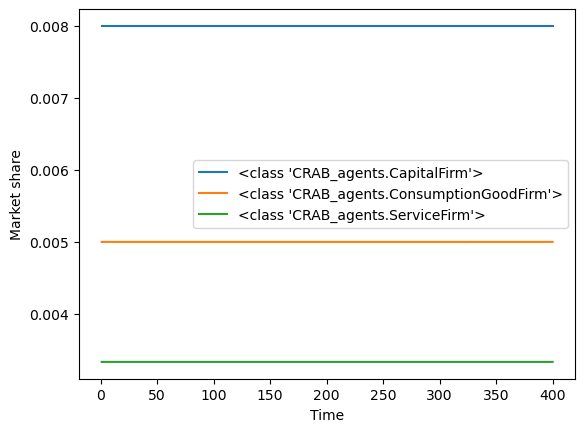

In [21]:
# Plot average market share per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Market share", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Market share", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Market share", color="tab:green")
plt.show()

#### NET WORTH

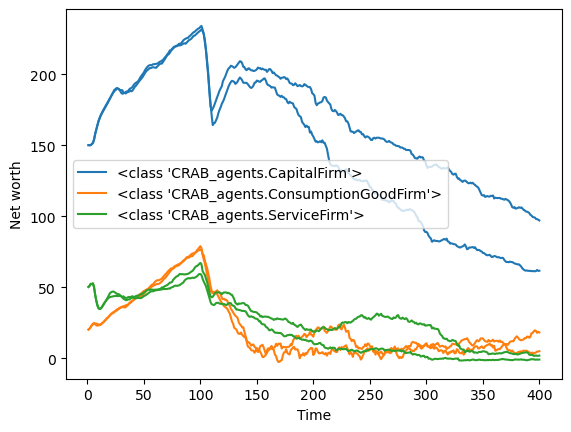

In [18]:
# Plot average net worth per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Net worth", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Net worth", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Net worth", color="tab:green")
plt.show()

#### PRODUCTIVITY and WAGES

##### Productivity : wage ratio

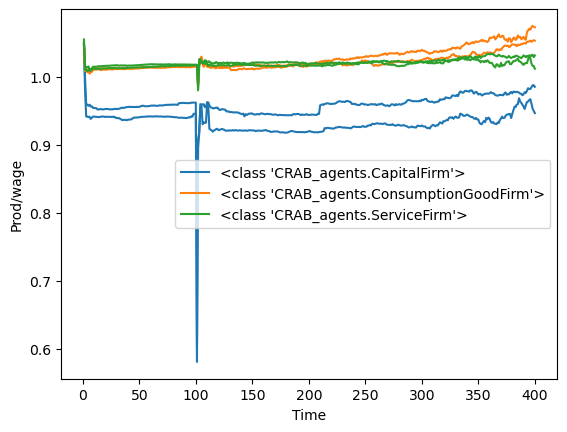

In [19]:
# Plot average ratio productivity : wage per sector
for df in agent_vars_df_list:
    df["Prod/wage"] = df["Prod"]/df["Wage"]
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod/wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod/wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod/wage", color="tab:green")
plt.show()

##### Wage

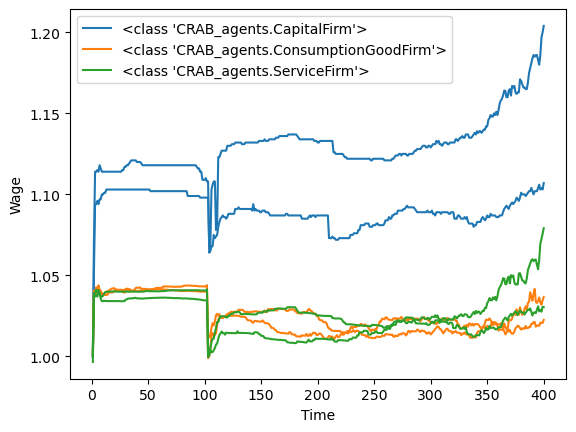

In [20]:
# Plot wages
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.show()

##### Productivity

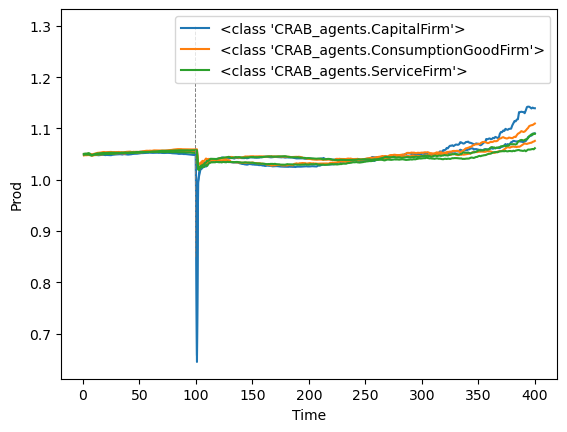

In [23]:
# Plot average productivity per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod", color="tab:green")
plt.vlines(flood_timesteps, ymin=1.3, ymax=0.85, color="grey", linestyle="--", linewidth=0.7)
# plt.ylim(0.7, 1.25)
# plt.xlim(30, 90)
plt.show()

##### Machine productivity

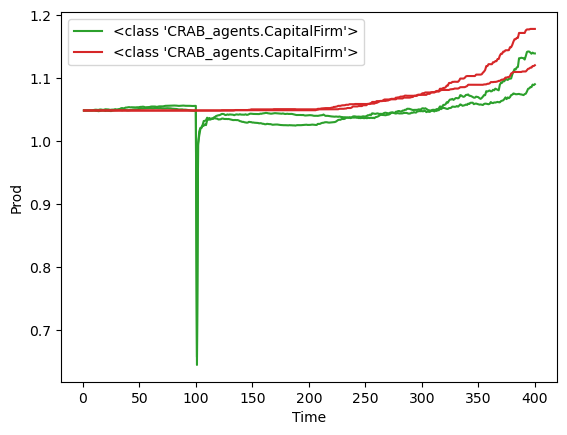

In [24]:
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod", color="tab:green")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Machine prod", color="tab:red")
plt.ylabel("Prod")
plt.show()

#### MACHINES

##### Capital amount

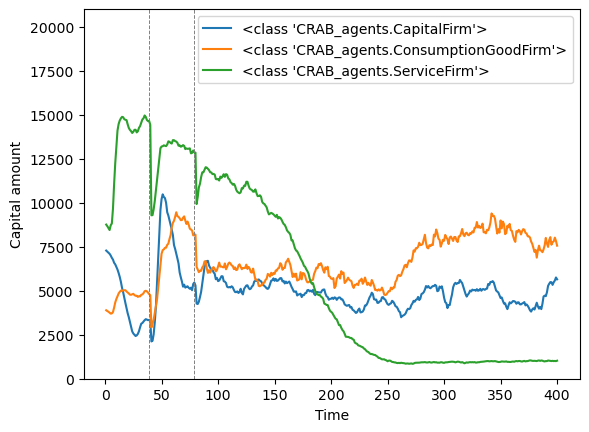

In [135]:
# Plot difference between desired machines and ordered machines (average)
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital amount", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital amount", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital amount", color="tab:green")
plt.vlines(flood_timesteps, ymin=-1, ymax=21000, color="grey", linestyle="--", linewidth=0.7)
plt.ylim(0, 21000)
# plt.xlim(0, 100)
plt.show()

##### Capital desired

In [ ]:
# Plot difference between desired machines and ordered machines (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="N ordered", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="N ordered", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="N ordered", color="tab:green")
plt.show()